# Not Just Another Genre Predictor - Supervised and Unsupervised Learning Algorithms for Genre Classification and Song Popularity

**<span style="color:CornflowerBlue">by Samantha Garcia, Brainstation Data Science Student (May - August 2022) </span>**

## Notebook 3: Supervised Learning Pipelines

### Table of Contents

    [1. Recap](#recap)
        1.1 Business Question
        1.2 Modeling Expectations
        1.3 Feature Dictionary
        
    [2. Visualing the Data]
        [2.1 Feature Distributions](#unsuperviseddistributions)
    
    [3. Supervised Dataset Transformations](#supervisedtransform)
        [3.1 Get Dummies](#getdummies)
        [3.2 Feature Distributions](#supervisedfeatures)
        
    [4. Scaling]
        [4.1 Scaling Requirement](#scaling)
        [4.2 Plot unscaled v scaled](#combine)
        
---
        

## 1. Recap

### 1.1 Business Question

>For any given song, can we derive a song's TRUE genre and subgenre - i.e. by inspecting the song's audio attributes derived by Spotify

Often, songs are given a genre subjectively by music managers' opinion. Developing an in-house model for categorising genre based on attributes, as well as a popularity measure, can be of value particularly when tailored for use alongside private data held by the song copyright owners.

**We will implement 2 learning algorithms as follows:**

1. a supervised learning model where we tell the algorithm what genres the songs belong to, based on subjective 'human' genre labels


2. an unsupervised learning model where we ask the algorithm to cluster songs based on their attributes, without seeing the songs' existing genre labels

**We will then see what clusters are derived by the unsupervised learning model and deduce:**

1. can define the song clusters in a way that is understandable to the average human music listener? we can cross reference the cluster outputs from this algorithm against the genre classes from the supervised learning algorithm to deteremine whether the genres are 'natural' genres or not


2. can we attribute song clusters as more or less valuable than others and deduce what song attributes contribute most to song value (based on popularity/ consumption)?

### 1.2 Modeling Expectations

For the supervised learning algorithm we will perform hyperparamter optimisation and model selection to choose a best fit model for multiclass classification. We will build a pipeline and perform grid search, using a Standard Scaler and PCA to transform the data within the pipeline. Grid search will implement a 5 fold cross validation as default, we will optimise for that within the pipeline also.

The models we will look at are:

- KNN
- SVM (multiclass)
- Random Forests

For the unsupervised learning algorithm we will look at 3 clustering methods to see which is the best fit for our dataset:

- K-Means
- DBSCAN
- Hierarchical Clustering

If we have time we will also look at how Neural Networks perform at classifying our songs.

We currently have 2 dataframes, one for the supervised algorithm and one for the unsupervised algorithm - they are the same except for the additional 6000+ rows for the 'alternative' genre in the unsupervised dataset.

### 1.3 Feature Dictionary

Let's revisit our data dictionary, focusing on the features we will analyse for the above models.

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>song_name</code> </td>
    <td style="text-align: left">Name of Song</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>danceability</code></td>
    <td style="text-align: left">Describes how suitable a track is for dancing based on a combination of musical elements including temppo, rhythm stability, beat stregth and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>energy</code></td>
    <td style="text-align: left">Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud and noisy. For example, death metal has high energy while a Bach prelude scores low on the scale. Perceptual features contribuiting to this attribute include dynamic range, perceived loudness, timbre, onset rate and general entropy.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>key</code></td>
    <td style="text-align: left">The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>loudness</code></td>
    <td style="text-align: left">The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>mode</code></td>
    <td style="text-align: left">Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>speechiness</code></td>
    <td style="text-align: left">Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>acousticness</code></td>
    <td style="text-align: left">number A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>instrumentalness</code></td>
    <td style="text-align: left">Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>liveness</code></td>
    <td style="text-align: left">Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>valence</code></td>
    <td style="text-align: left">A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>tempo</code></td>
    <td style="text-align: left">The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>id</code></td>
    <td style="text-align: left">The Spotify ID for the track. This is our unique identifier, consider making this the index.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>uri</code></td>
    <td style="text-align: left">The Spotify URI for the track. A Spotify URI is a unique resource indicator code (and link) for music on their platform. It is a link to directly share your songs to fans.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>track_href</code></td>
    <td style="text-align: left">A link to the Web API endpoint providing full details of the track.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>analysis_url</code></td>
    <td style="text-align: left">A URL to access the full audio analysis of this track. An access token is required to access this data.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>duration_ms</code></td>
    <td style="text-align: left">The duration of the track in milliseconds.</td>
  </tr>
      <tr>
    <td style="text-align: left"><code>time_signature</code></td>
    <td style="text-align: left">An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".</td>
  </tr>
          <tr>
    <td style="text-align: left"><code>genre</code></td>
    <td style="text-align: left">Subjective genre given to each group of songs based on user perception.</td>
  </tr>
</table>

The dataset currently contains columns we won't be using for analysis, which we will drop when we perform feature selction below.

---

Let's import our packages and csv files

In [1]:
# import required packages
# packages will be added here as they come up during coding
# this is therefore a complete list of all packages used within this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataframes from csv files from notebook #1
supervised_songs_df = pd.read_csv('../data/supervised_songs_df.csv')
unsupervised_songs_df = pd.read_csv('../data/unsupervised_songs_df.csv')

### 2.3 Train Test Split
For our supervised learning algorithm we need to do a train test split so that we can set aside some unseen data to see how our models perform on that unseen data once we have a fine-tuned model that we are happy with.

We will keep aside 25% as our test set.

In [ ]:
# set x (features) and y (target) columns
X = supervised_songs_df_num.drop(['genre'], axis=1)
y = supervised_songs_df_num['genre']

In [ ]:
# create train test split keeping 25% for our test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

---
## 2. Visualising the Data

### 2.1 Feature Distributions

We will focus first on the unsupervised learning dataset as the supervised dataset is a subset of the unsupervised. We'll then run through the supervised set to perform the same steps.

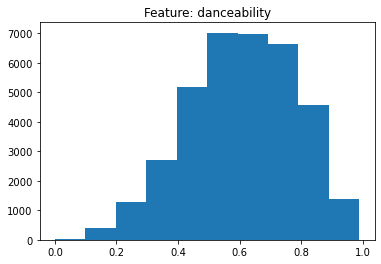

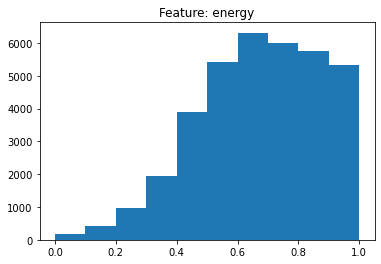

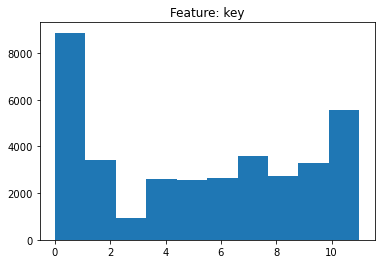

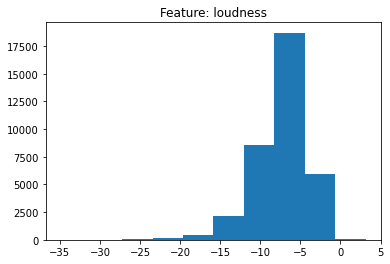

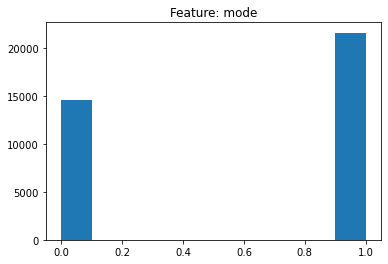

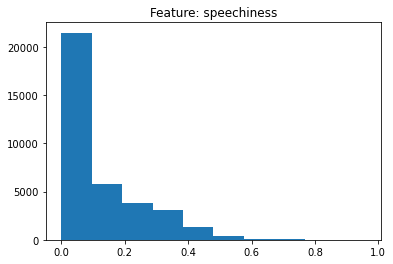

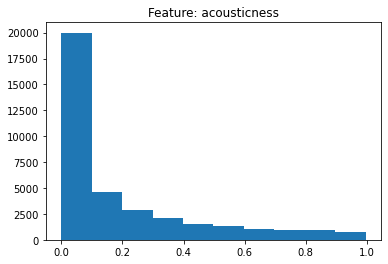

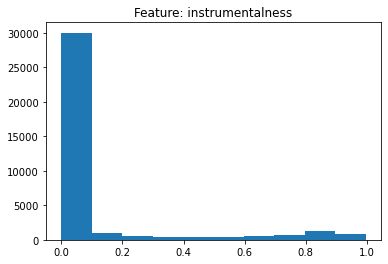

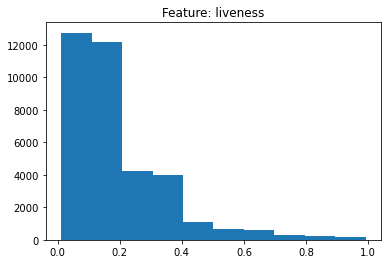

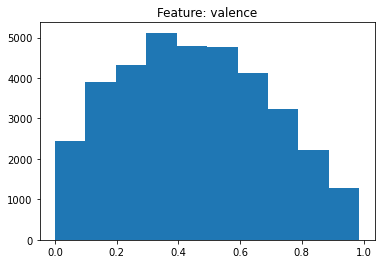

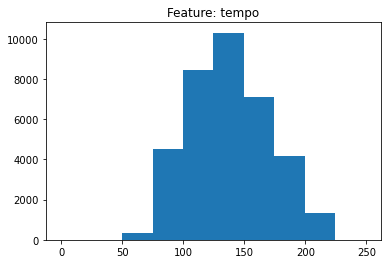

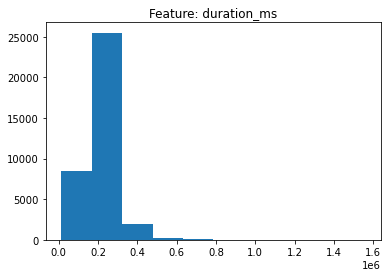

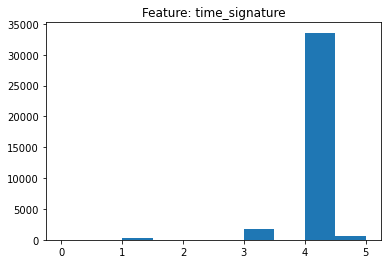

In [7]:
# plot histograms for the unsupervised dataset
for col in unsupervised_songs_df.drop(['song_name', 'genre'], axis=1):
    plt.figure()
    plt.title(f'Feature: {col}')
    plt.hist(unsupervised_songs_df[col])
    plt.show()

The data looks ok to go straight into scaling and pipelining.

Let's look at the supervised dataset.

## DISCUSS DISTRIBUTIONS OF THE FEATURES

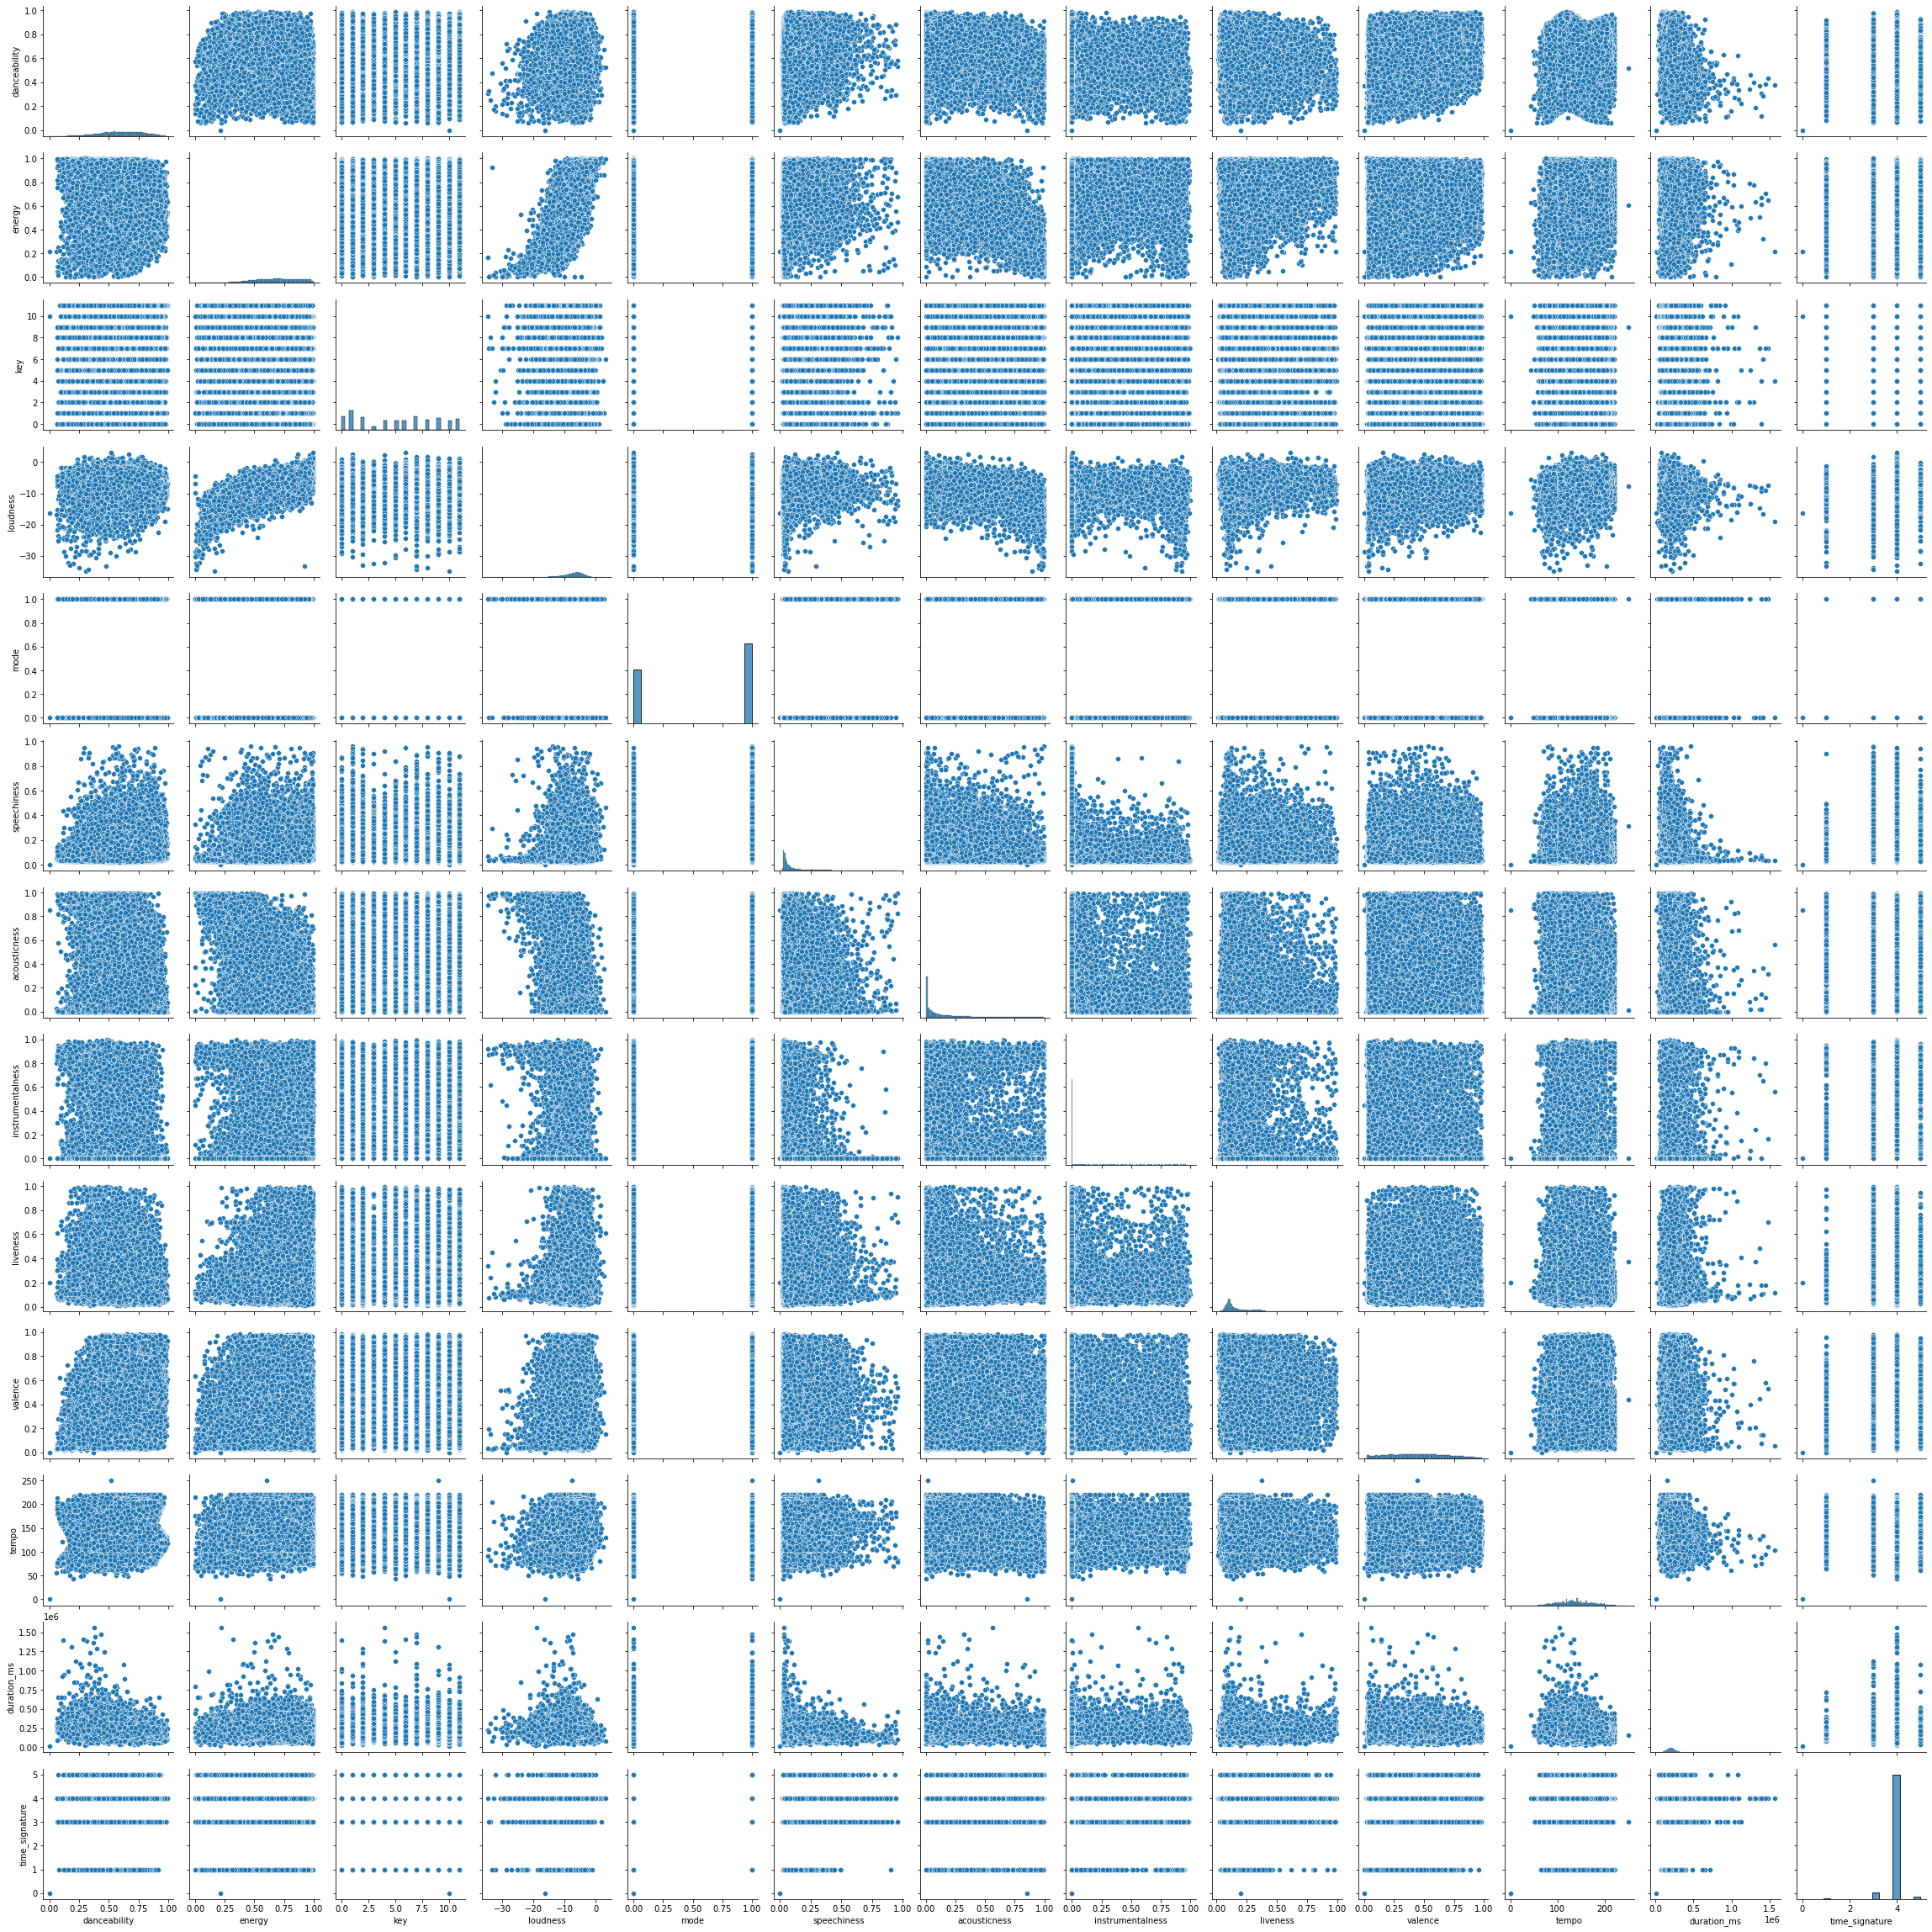

In [11]:
sns.pairplot(unsupervised_songs_df.drop(['song_name'],axis=1))

## TALK ABOUT ENERGY AND LOUDNESS

## 3. Supervised Dataset Transformations

### 3.1 Get Dummies

For the supervised learning dataset we need to tansform the genre column into binarised dummy variables for each genre.

In [8]:
# convert genre column using get dummies
supervised_songs_df = pd.get_dummies(supervised_songs_df, prefix='g', prefix_sep='_', columns=['genre'])
supervised_songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,g_alt_rock,g_hiphop,g_pop,g_rap,g_rock,g_trap
0,Spiral,0.814,0.659,2,-4.475,1,0.0829,0.001550,0.025100,0.5680,0.130,88.506,171527,4,0,1,0,0,0,0
1,"SHELTER ft Wyclef Jean, ft Chance The Rapper",0.664,0.660,0,-5.284,1,0.2910,0.181000,0.000002,0.1900,0.470,90.106,261467,4,0,1,0,0,0,0
2,Welcome To The Riches (feat. Lil Baby),0.842,0.400,11,-11.308,0,0.4860,0.045700,0.000000,0.1720,0.205,130.018,192052,4,0,1,0,0,0,0
3,Stepney Tale,0.632,0.800,5,-7.227,0,0.2340,0.547000,0.000000,0.1470,0.496,92.757,209833,4,0,1,0,0,0,0
4,Fire and Brimstone,0.846,0.511,1,-8.116,1,0.2630,0.037500,0.000005,0.1470,0.346,136.964,190773,4,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28051,"Going Up, Going Down",0.440,0.628,1,-8.116,1,0.0612,0.360000,0.080500,0.0985,0.124,152.802,172925,4,0,0,0,0,0,1
28052,Fuck Your Trends,0.732,0.794,2,-6.910,1,0.1050,0.012900,0.658000,0.1200,0.463,151.987,191053,4,0,0,0,0,0,1
28053,We're Not the Same,0.291,0.954,8,-4.187,0,0.4650,0.000131,0.019000,0.5010,0.324,180.984,170342,4,0,0,0,0,0,1
28054,Happy Birthday Bitch,0.582,0.635,0,-8.524,1,0.0388,0.008050,0.000002,0.1000,0.402,114.990,168690,4,0,0,0,0,0,1


### 2.2 Feature Distribution - supervised dataset

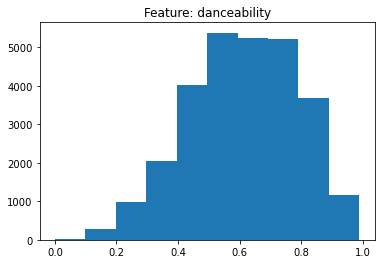

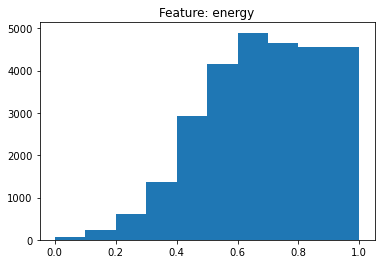

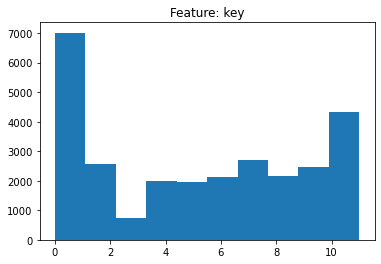

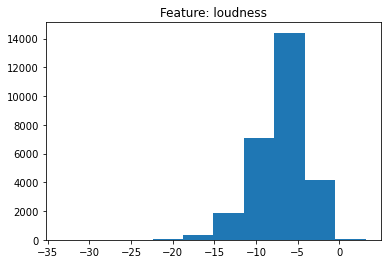

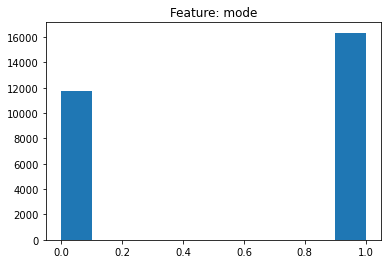

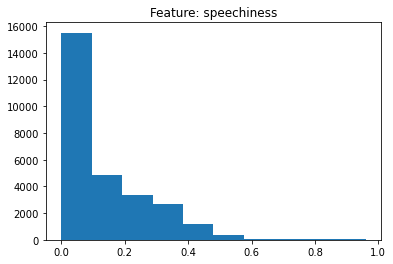

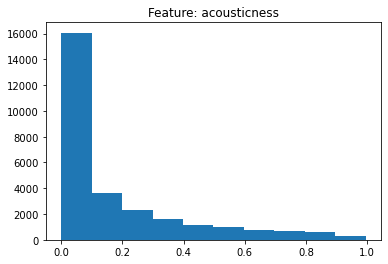

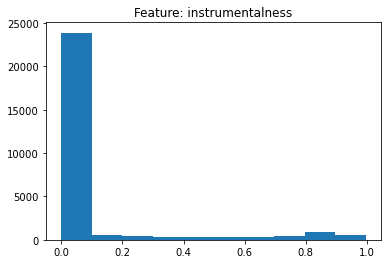

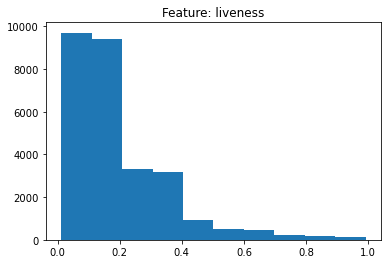

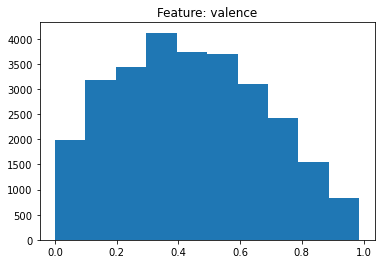

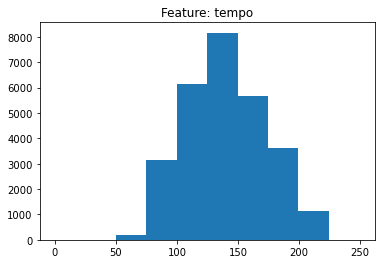

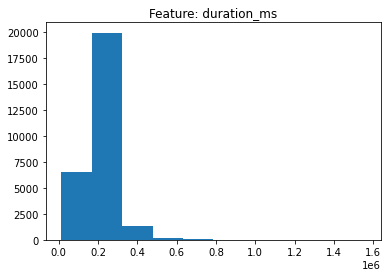

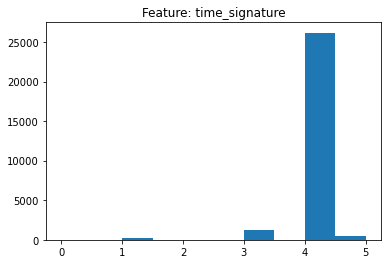

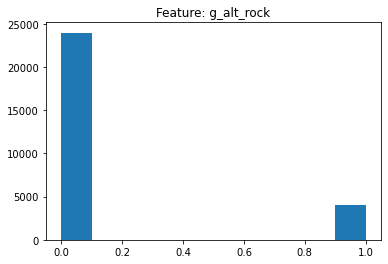

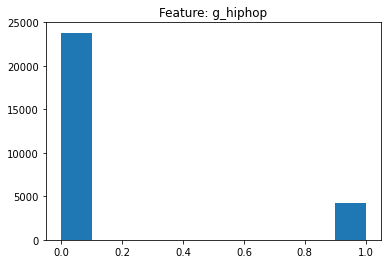

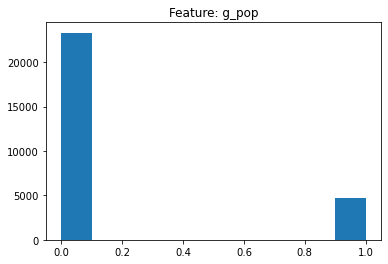

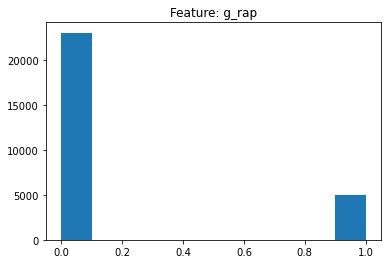

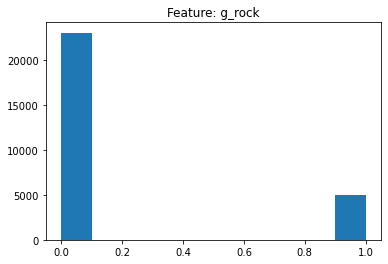

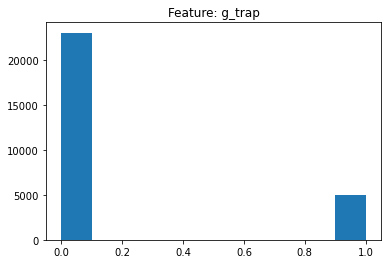

In [9]:
# plot histograms for the supervised dataset
for col in supervised_songs_df.drop(['song_name'], axis=1):
    plt.figure()
    plt.title(f'Feature: {col}')
    plt.hist(supervised_songs_df[col])
    plt.show()


## DISCUSS DISTRIBUTIONS OF THE FEATURES

## 4. Scaling

### 4.1 Scaling Requirement

We need to scale the data to use in our modelling as we will be using many distancing techniques in our modelling. Unscaled, some of our columns are in the range 0 to 1 whereas others are in the hundreds of thousands (e.g. duration_ms).

### 4.2 Plot unscaled v scaled
Let's scale our data using a standard scaler and see how that looks for each column before and after scaling.